# Import Libraries

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import Dataset

In [2]:
dataset_df = pd.read_csv('USA_Housing.csv')

# Data Analysis

In [3]:
dataset_df = dataset_df.drop('Address', axis=1)

Feature Address is Irrelevant so dropping it

In [4]:
dataset_df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09     23086.800503  1.059034e+06  
1                             3.09     40173.072174  1.505891e+06  
2                             5.13     36882.159400  1.058988e+06  
3                             3.26     34310.242831  1.260617e+06  
4                             4.23     26354.109472  6.309435e+05  
...                            ...              ...           ...  
4995                          3.46     22837.361035  1.060194e+06  
4996                          4.02     25616.115489  1.482618e+06  
4997                          2.13     33266.145490  1.030730e+06  
4998                          5.44     42625.620156  1.198657e+06  
4999                          4.07     46501.283803  1.298950e+06  

[5000 rows x 6 columns]

In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


There are no null values in the dataset

# Statistics of the Dataset

In [6]:
dataset_df.corr()

Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area Income                                  0.019788        -0.016234   
Avg. Area House Age                               0.006149        -0.018743   
Avg. Area Number of Rooms                         0.462695         0.002040   
Avg. Area Number of Bedrooms                      1.000000        -0.022168   
Area Population                                  -0.022168         1.000000   
Price                                             0.171071         0.408556   

                                 Price  
Avg. Area Income              0.639734  
Avg. Area House Age           0.452543  
Avg. Area Number of Rooms     0.335664  
Avg. Area Number of Bedrooms  0.171071  
Area Population               0.408556  
Price                         1.000000

## Problem Statement And Dataset Explanations
Build an Linear Regression Model to predict price of houses, given the following features.

#### Features
<b>Avg. Area Income:</b> Avg. Income of residents in the city where the house is located<br>
<b>Avg. Area House Age:</b> Avg Age of Houses in the city where the house is located<br>
<b>Avg. Area Number of Rooms:</b> Avg Number of Rooms in the Houses of the city where the house is located<br>
<b>Avg. Area Number of Bedrooms:</b> Avg Number of Bedrooms in the Houses of the city where the house in same city<br>
<b>Area Population:</b> Population of the city where the house is located<br>
<b>Price:</b> Price at which the house was sold<br>
<b>Address:</b> Address of the house<br>

<b>Note : </b>Address column is dropped since it makes no sense in predicting Houseing Price

## 1) Avg. Area Income	Distribution

In [7]:
fig = px.histogram(dataset_df, x='Avg. Area Income', marginal='box', title='Avg. Area Income Distribution')
fig.update_layout(bargap=0.1)
fig.show()

Normal Distribution<br>
Most people's average income is around 62K - 76K

## 2) Avg. Area House Age	Distribution

In [8]:
fig = px.histogram(dataset_df, x='Avg. Area House Age', marginal='box', title='Avg. Area House Age Distribution', color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)
fig.show()

Normal Distribution<br>
Most houses are around 5.32 - 6.65 years old

## 3) Avg. Area Number of Rooms	Distribution

In [9]:
fig = px.histogram(dataset_df, x='Avg. Area Number of Rooms', title='Avg. Area Number of Rooms Distribution', marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

Normal Distribution<br>
Most houses containsaround 6.2 - 7.6 rooms (average so it is in fraction)

## 4) Avg. Area Number of Bedrooms Distribution

In [10]:
fig = px.histogram(dataset_df, x='Avg. Area Number of Bedrooms', title='Avg. Area Number of Bedrooms Distribution', nbins=round(6.5-2+1), color_discrete_sequence=['red'], marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

Most of the houses have 3 - 4 bedrooms


## 5) Area Population Distribution

In [11]:
fig=px.histogram(dataset_df, x='Area Population', marginal='box', title='Area Population Distribution')
fig.update_layout(bargap=0.1)
fig.show()

Normal Distribution<br>
Most of the houses are located in cities with average population around 29K - 43K

In [12]:
dataset_df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

# Scatter & Violin Plots

## 1) Scatter Plot : Avg. Area Income Vs Price

In [13]:
fig = px.scatter(dataset_df, x='Avg. Area Income', y='Price', title='Avg. Area Income Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [14]:
print('Correlation Between Avg. Area Income And Price =',dataset_df['Price'].corr(dataset_df['Avg. Area Income']))

Correlation Between Avg. Area Income And Price = 0.639733778249894


From the plot, it can be inferred that the both variables are positively correlated. (Not Necessarily Imply Causation)

## 2) Scatter Plot : Avg. Area House Age Vs Price

In [15]:
fig=px.scatter(dataset_df, x='Avg. Area House Age', y='Price', title='Avg. Area House Age Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
print('Correlation Between Avg. Area House Age And Price =',dataset_df['Price'].corr(dataset_df['Avg. Area House Age']))

Correlation Between Avg. Area House Age And Price = 0.45254253717875587


From the plot, it can be inferred that the both variables are positively correlated. (Not Necessarily Imply Causation)

## 3) Scatter Plot : Avg. Area Number of Rooms Vs Price

In [17]:
fig = px.scatter(dataset_df, x='Avg. Area Number of Rooms', y='Price', title='Avg. Area Number of Rooms Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [18]:
print('Correlation Between Avg. Area House Age And Price =',dataset_df['Price'].corr(dataset_df['Avg. Area Number of Rooms']))

Correlation Between Avg. Area House Age And Price = 0.33566445336675976


From the plot, it can be inferred that the both variables are positively correlated. (Not Necessarily Imply Causation)

## 4) Violin Plot : Avg. Area Number of Bedrooms Vs Price

In [19]:
fig=px.violin(dataset_df, x='Avg. Area Number of Bedrooms', y='Price', title='Avg. Area Number of Bedrooms Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [20]:
print('Correlation Between Avg. Area House Age And Price =',dataset_df['Price'].corr(dataset_df['Avg. Area Number of Bedrooms']))

Correlation Between Avg. Area House Age And Price = 0.17107102765855592


From the plot, it seems 'Price' does not depend on 'Avg. Area Number of Bedrooms'.<br>
Also Correlation of both variables is not higher therefore only little correlation

## 5) Scatter Plot : Area Population Vs Price

In [21]:
fig = px.scatter(dataset_df, x='Area Population', y='Price', title='Area Population Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [22]:
print('Correlation Between Avg. Area House Age And Price =',dataset_df['Price'].corr(dataset_df['Area Population']))

Correlation Between Avg. Area House Age And Price = 0.4085558793165563


From the plot, it can be inferred that the both variables are positively correlated. (Not Necessarily Imply Causation)

In [23]:
dataset_df.corr()

Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area Income                                  0.019788        -0.016234   
Avg. Area House Age                               0.006149        -0.018743   
Avg. Area Number of Rooms                         0.462695         0.002040   
Avg. Area Number of Bedrooms                      1.000000        -0.022168   
Area Population                                  -0.022168         1.000000   
Price                                             0.171071         0.408556   

                                 Price  
Avg. Area Income              0.639734  
Avg. Area House Age           0.452543  
Avg. Area Number of Rooms     0.335664  
Avg. Area Number of Bedrooms  0.171071  
Area Population               0.408556  
Price                         1.000000

### Heatmap

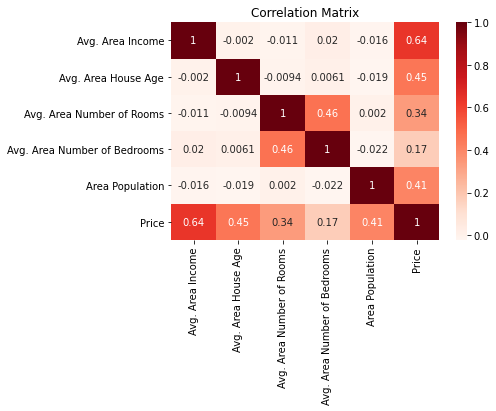

In [24]:
sns.heatmap(dataset_df.corr(), annot=True, cmap='Reds');
plt.title('Correlation Matrix');

## Result

<b>Dependent Variables :</b>(Decreasing Order)<br>
    1) Avg. Area Income<br>
    2) Avg. Area House Age<br>
    3) Area Population<br>
    4) Avg. Area Number of Rooms<br>
    5) Avg. Area Number of Bedrooms<br>
    
<b>Independent Variables :</b><br>
    1) Address<br>
    
<b>Note : </b> Address Feature is dropped because it is obvious that it doesn't make sense to include in predicting price

# 2) Linear Regression - Single Feature
### 1) Avg. Area Income Vs House Price

In [25]:
X = np.array(dataset_df['Avg. Area Income'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [26]:
model = LinearRegression().fit(X, Y)

In [27]:
Y_pred = model.predict(X)

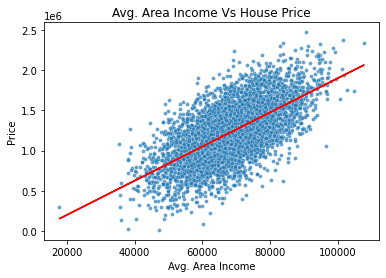

In [28]:
sns.scatterplot(data=dataset_df,x='Avg. Area Income', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Avg. Area Income Vs House Price');

In [29]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 271377.8560147998


### 2) Avg. Area House Age Vs House Price

In [30]:
X = np.array(dataset_df['Avg. Area House Age'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [31]:
model = LinearRegression().fit(X, Y)

In [32]:
Y_pred = model.predict(X)

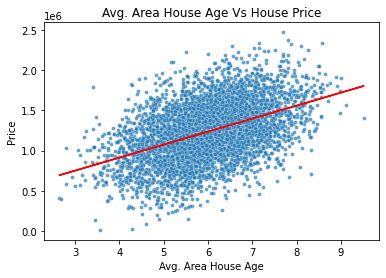

In [33]:
sns.scatterplot(data=dataset_df,x='Avg. Area House Age', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Avg. Area House Age Vs House Price');

In [34]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 314858.6165482237


### 3) Area Population Vs House Price

In [35]:
X = np.array(dataset_df['Area Population'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [36]:
model = LinearRegression().fit(X, Y)

In [37]:
Y_pred = model.predict(X)

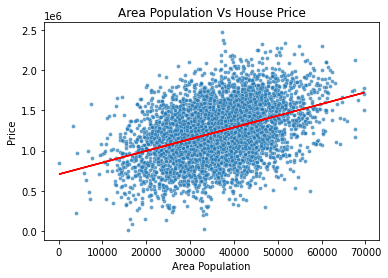

In [38]:
sns.scatterplot(data=dataset_df,x='Area Population', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Area Population Vs House Price');

In [39]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 322269.98796469043


### 4) Avg. Area Number of Rooms Vs House Price

In [40]:
X = np.array(dataset_df['Avg. Area Number of Rooms'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [41]:
model = LinearRegression().fit(X, Y)

In [42]:
Y_pred = model.predict(X)

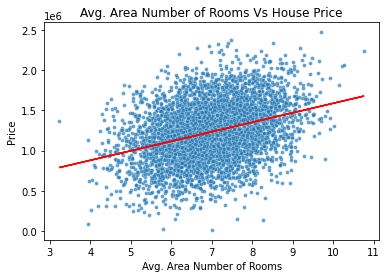

In [43]:
sns.scatterplot(data=dataset_df,x='Avg. Area Number of Rooms', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Avg. Area Number of Rooms Vs House Price');

In [44]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 332597.0496790043


### 5) Avg. Area Number of Bedrooms Vs House Price

In [45]:
X = np.array(dataset_df['Avg. Area Number of Bedrooms'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [46]:
model = LinearRegression().fit(X, Y)

In [47]:
Y_pred = model.predict(X)

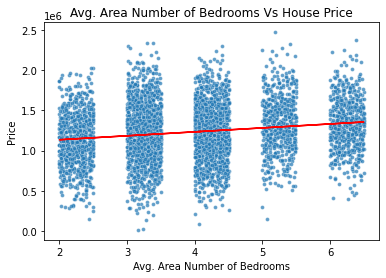

In [48]:
sns.scatterplot(data=dataset_df,x='Avg. Area Number of Bedrooms', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Avg. Area Number of Bedrooms Vs House Price');

In [49]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 347877.42031584954


#### Error Analysis (Increasing Order)
<b>1) Avg. Area Income Vs House Price</b> - 271377.8560147998<br>
<b>2) Avg. Area House Age Vs House Price</b> - 314858.6165482237<br>
<b>3) Area Population Vs House Price</b> - 322269.98796469043<br>
<b>4) Avg. Area Number of Rooms Vs House Price</b> - 332597.0496790043<br>
<b>5) Avg. Area Number of Bedrooms Vs House Price</b> - 347877.42031584954<br>

# 3) Linear Regression - Multiple Features
### 1) Avg. Area Income & Avg. Area House Age Vs House Price

In [50]:
X = np.array(dataset_df[['Avg. Area Income','Avg. Area House Age']])
Y = np.array(dataset_df['Price'])

In [51]:
model = LinearRegression().fit(X, Y)

In [52]:
Y_pred = model.predict(X)

In [53]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 219019.63342003038


Error is reduced so continue considering this variable

### 2) Avg. Area Income, Avg. Area House Age & Area Population Vs House Price

In [54]:
X = np.array(dataset_df[['Avg. Area Income','Avg. Area House Age','Area Population']])
Y = np.array(dataset_df['Price'])

In [55]:
model = LinearRegression().fit(X, Y)

In [56]:
Y_pred = model.predict(X)

In [57]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 158669.21631504


Error is reduced so continue considering this variable

### 3) Avg. Area Income, Avg. Area House Age, Area Population & Avg. Area Number of Rooms Vs House Price

In [58]:
X = np.array(dataset_df[['Avg. Area Income','Avg. Area House Age','Area Population','Avg. Area Number of Rooms']])
Y = np.array(dataset_df['Price'])

In [59]:
model = LinearRegression().fit(X, Y)

In [60]:
Y_pred = model.predict(X)

In [61]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 101108.81222494376


Error is reduced so continue considering this variable

### 3) Avg. Area Income, Avg. Area House Age, Area Population, Avg. Area Number of Rooms & Avg. Area Number of Bedrooms Vs House Price

In [62]:
X = np.array(dataset_df[['Avg. Area Income','Avg. Area House Age','Area Population','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms']])
Y = np.array(dataset_df['Price'])

In [63]:
model = LinearRegression().fit(X, Y)

In [64]:
Y_pred = model.predict(X)

In [65]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 101092.70158252279


Error is not reduced significantly so this feature can be discarded

# 4) Model Improvements - Feature Scaling

In [66]:
scaler = StandardScaler()
scaler.fit(dataset_df)
scaled_X = scaler.transform(dataset_df)
Y = np.array(dataset_df['Price'])

In [67]:
model = LinearRegression().fit(scaled_X, Y)

In [68]:
Y_pred = model.predict(scaled_X)

In [69]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 1.5309304922696454e-10


### Result & Conclusion
Error is significantly reduced.<br>


# 7) Creating Test Data

Splitting 20% of Data as  Test Data

In [70]:
X = np.array(dataset_df)
Y = np.array(dataset_df['Price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

In [71]:
model = LinearRegression().fit(X_train, Y_train)

In [72]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [73]:
print('Mean Squared Training Error =',math.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))
print('Mean Squared Testing Error =',math.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

Mean Squared Training Error = 1.879317943993501e-09
Mean Squared Testing Error = 1.8781381344376363e-09
